In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_control_day = pd.read_csv('reddit_hate/fph/df_control_day.csv')
df_control_month = pd.read_csv('reddit_hate/fph/df_control_month.csv')

# print df_control_day

In [4]:
treatment_pre = pd.read_csv('reddit_hate/fph/treatment-fph-preban-daily-30day.csv')
treatment_post = pd.read_csv('reddit_hate/fph/treatment-fph-postban-daily-30day.csv')
treatment_pre_month = pd.read_csv('reddit_hate/fph/treatment-fph-preban-monthly-2015.csv')
treatment_post_month = pd.read_csv('reddit_hate/fph/treatment-fph-postban-monthly-2015.csv')

df_treatment_day = treatment_pre.append(treatment_post)
df_treatment_month = treatment_pre_month.append(treatment_post_month)


In [158]:
import numpy as np

def hate_vs_total(df, title='',label=''):
    groupby_day = df.groupby('day')[['hate_speech', 'total_posts']]
    
    groupby_day_total = groupby_day.sum()['total_posts']
    groupby_day_hate = groupby_day.sum()['hate_speech']
    
    groupby_day_hate.plot(y = 'hate_speech',label=label)
    plt.ylabel('Hate Speech')
    plt.title(title + " Hate")
    plt.legend()
    plt.savefig('reddit_hate/graphs/' + title + '_hate.jpg')
    plt.show()
    groupby_day_total.plot(y = 'total_posts',label=label)
    plt.ylabel('Total Posts')
    plt.title(title + " Total")
    plt.legend()
    plt.savefig('reddit_hate/graphs/' + title + '_total.jpg')
    plt.show()

def norm_hate_vs_total(df, title='',label=''):
    grouped = df.groupby('day')[['hate_speech', 'total_posts']]

    norm_hate = grouped.sum()['hate_speech'] / grouped.sum()['total_posts']
    norm_total = grouped.sum()['total_posts']

    norm_hate.plot(y = 'hate_speech',label=label)
    plt.ylabel('Normalized Hate Speech')
    plt.title(title + " Normalized Hate")
    plt.legend()
    # plt.savefig(str(num_power_users) + '_power_users_hate.jpg')
    plt.savefig('reddit_hate/graphs/' + title + '_norm_hate.jpg')
    plt.show()

    norm_total.plot(y = 'total_posts',label=label)
    plt.ylabel('Total Posts')
    plt.title(title + " Total")
    plt.legend()
    # plt.savefig(str(num_power_users) + '_power_users_total.jpg')
    plt.savefig('reddit_hate/graphs/' + title + '_total.jpg')
    plt.show()

    
def norm_hate_comparison(df1, df2, ylim=None, title='', label1='', label2=''):
    grouped_1 = df1.groupby('day')[['hate_speech', 'total_posts']]
    grouped_1_norm_hate = grouped_1.sum()['hate_speech'] / grouped_1.sum()['total_posts']
    grouped_2 = df2.groupby('day')[['hate_speech', 'total_posts']]
    grouped_2_norm_hate = grouped_2.sum()['hate_speech'] / grouped_2.sum()['total_posts']
    
    ax = grouped_1_norm_hate.plot(y = 'hate_speech', label=label1)
    grouped_2_norm_hate.plot(y = 'hate_speech', ax=ax, label=label2)
    plt.ylim(ylim)
    plt.ylabel('Normalized Hate Speech')
    plt.title(title + " Hate")
    # plt.savefig(str(num_power_users) + '_power_users_hate.jpg')
    plt.legend()
    plt.savefig('reddit_hate/graphs/' + title+'_norm_hate_comparison.jpg')
    plt.show()
    
def total_comparison(df1, df2, ylim=None, title='', label1='', label2=''):
#     print df1
    grouped_1 = df1.groupby('day')[['hate_speech', 'total_posts']]
    grouped_1_total = grouped_1.sum()['total_posts']
    grouped_2 = df2.groupby('day')[['hate_speech', 'total_posts']]
    grouped_2_total = grouped_2.sum()['total_posts']
    
    ax = grouped_1_total.plot(y = 'total_posts', label=label1)
    grouped_2_total.plot(y = 'total_posts', ax=ax, label=label2)
    plt.ylim(ylim)
    plt.ylabel('Total Posts')
    plt.title(title + " Total")
    # plt.savefig(str(num_power_users) + '_power_users_hate.jpg')
    plt.legend()
    plt.savefig('reddit_hate/graphs/' + title+'_total_comparison.jpg')
    plt.show()
    
def total_comparison_log(df1, df2, ylim=None, title='', label1='', label2=''):
    grouped_1 = df1.groupby('day')[['hate_speech', 'total_posts']]
    grouped_1_total = grouped_1.sum()['total_posts']
    grouped_2 = df2.groupby('day')[['hate_speech', 'total_posts']]
    grouped_2_total = grouped_2.sum()['total_posts']

    grouped_1_total = pd.DataFrame(grouped_1_total)
    grouped_2_total = pd.DataFrame(grouped_2_total)

    grouped_1_total['total_posts'] = grouped_1_total['total_posts'].apply(np.log)
    grouped_2_total['total_posts'] = grouped_2_total['total_posts'].apply(np.log)

    ax = grouped_1_total.plot(y = 'total_posts', label=label1)
    grouped_2_total.plot(y = 'total_posts', ax=ax, label=label2)
    plt.ylim(ylim)
    plt.ylabel('Total Posts')
    plt.title(title + " Total")
    plt.ylim()
    # plt.savefig(str(num_power_users) + '_power_users_hate.jpg')
    plt.legend()
    plt.savefig('reddit_hate/graphs/' + title+'_total_comparison_LOG.jpg')
    plt.show()
    
def norm_hate_comparison_stacked(df1, df2, ylim=None, title='', label1='', label2=''):
    grouped_1 = df1.groupby('day')[['hate_speech', 'total_posts']]
    grouped_1_norm_hate = grouped_1.sum()['hate_speech'] / grouped_1.sum()['total_posts']
    grouped_2 = df2.groupby('day')[['hate_speech', 'total_posts']]
    grouped_2_norm_hate = grouped_2.sum()['hate_speech'] / grouped_2.sum()['total_posts']
    
    print np.arange(min(grouped_1_norm_hate.index), max(grouped_1_norm_hate.index), 5.0)

    ax = grouped_1_norm_hate.plot(y = 'hate_speech', label=label1, kind='bar', stacked=True, color='Green')
    grouped_2_norm_hate.plot(y = 'hate_speech', kind='bar', stacked=True, ax=ax, label=label2)
    plt.ylim(ylim)
#     plt.xticks(grouped_1_norm_hate.index.values, 5)
#     ax.xaxis.set_ticks(np.arange(min(grouped_1_norm_hate.index)+1, max(grouped_1_norm_hate.index), 5.0))
    plt.ylabel('Normalized Hate Speech')
    plt.title(title + " Hate")
    plt.savefig('norm_hate_stacked_tester.jpg')
    plt.legend()
    plt.savefig('reddit_hate/graphs/' + title+'_norm_hate_comparison.jpg', format='svg', dpi=1500)
    plt.show()
    
def haters_vs_speech(df1, df2, ylim=None, title='', label1='', label2=''):
#     print df1
    df1_pre = df1[df1.day < 0]
    df1_post = df1[df1.day >= 0]
    
    df1_pre_grouped = df1_pre.groupby('subreddit')[['hate_speech', 'total_posts']]
    df1_pre = pd.DataFrame(df1_pre_grouped.median()['hate_speech'])
    df1_pre['total_posts'] = df1_pre_grouped.median()['total_posts']
    
    df1_post_grouped = df1_post.groupby('subreddit')[['hate_speech', 'total_posts']]
    df1_post = pd.DataFrame(df1_post_grouped.median()['hate_speech'])
    df1_post['total_posts'] = df1_post_grouped.median()['total_posts']
    
    df1_pre.columns = ['pre_hate_speech', 'pre_total_posts']
    df1_post.columns = ['post_hate_speech', 'post_total_posts']
    
    df1 = df1_pre
    df1 = pd.concat([df1, df1_post], axis=1)
    df1['hate_speech'] = 0
    df1['total_posts'] = 0
#     print df1
    
    def compute(row):
#         print row
#         print
        if row['pre_hate_speech'] != 0:
            row['hate_speech'] = (row['post_hate_speech'] - row['pre_hate_speech'])/ row['pre_hate_speech']
        
        if row['pre_total_posts'] != 0:
            row['total_posts'] = (row['post_total_posts'] - row['pre_total_posts'])/ row['pre_total_posts']
        return row
    
#     print df1
    
    df1 = df1.apply(compute, axis=1)
    
    df1.plot.scatter(x='total_posts', y='hate_speech')
#     plt.scatter(df1['total_posts'], df1['hate_speech'], s=df1.index.values)
    plt.show()
    print df1

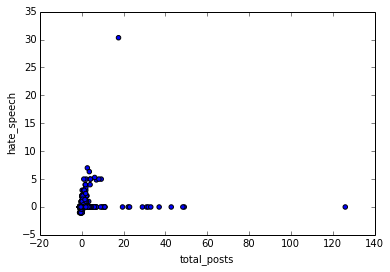

                       pre_hate_speech  pre_total_posts  post_hate_speech  \
subreddit                                                                   
100DaysofKeto                      7.0              4.0              41.0   
29er                               0.0              6.5               1.0   
3dshacks                           0.0             28.0               0.0   
50B                                1.5             53.0               3.0   
911fanart                          0.0              0.5               0.0   
ACMilan                            2.0             95.0               2.0   
ACT                                0.0              1.0               0.0   
ANTM                               0.0              1.0               0.0   
ANW                                0.0              0.0               0.0   
ATV                                0.0              2.5               0.0   
AccidentalComedy                   0.0              0.0               0.0   

In [159]:
treatment_subs_sorted_day_pre = pd.read_csv('reddit_hate/fph/treatment-fph-sorted-influx-subs-preban-daily-30days.csv')
treatment_subs_sorted_day_post = pd.read_csv('reddit_hate/fph/treatment-fph-sorted-influx-subs-postban-daily-30days.csv')
treatment_subs_sorted_month_pre = pd.read_csv('reddit_hate/fph/treatment-fph-sorted-influx-subs-preban-monthly-2015.csv')
treatment_subs_sorted_month_post = pd.read_csv('reddit_hate/fph/treatment-fph-sorted-influx-subs-postban-monthly-2015.csv')
                                            
treatment_subs_invaded_day_pre = pd.read_csv('reddit_hate/fph/treatment-fph-newly-invaded-subs-preban-daily-30days.csv')
treatment_subs_invaded_day_post = pd.read_csv('reddit_hate/fph/treatment-fph-newly-invaded-subs-postban-daily-30days.csv')
treatment_subs_invaded_month_pre = pd.read_csv('reddit_hate/fph/treatment-fph-newly-invaded-subs-preban-monthly-2015.csv')
treatment_subs_invaded_month_post = pd.read_csv('reddit_hate/fph/treatment-fph-newly-invaded-subs-postban-monthly-2015.csv')

treatment_subs_sorted_day = treatment_subs_sorted_day_pre.append(treatment_subs_sorted_day_post)
treatment_subs_sorted_month = treatment_subs_sorted_month_pre.append(treatment_subs_sorted_month_post)

treatment_subs_invaded_day = treatment_subs_invaded_day_pre.append(treatment_subs_invaded_day_post)
treatment_subs_invaded_month = treatment_subs_invaded_month_pre.append(treatment_subs_invaded_month_post)

haters_vs_speech(treatment_subs_sorted_day, treatment_subs_invaded_day)

[-31. -26. -21. -16. -11.  -6.  -1.   4.   9.  14.  19.  24.]


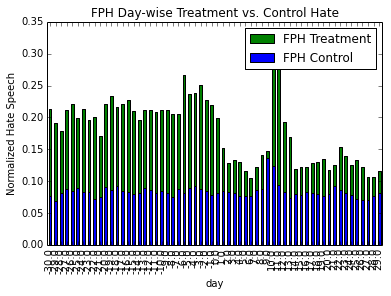

In [157]:
# norm_hate_comparison(df_treatment_day, df_control_day, title='FPH Day-wise Treatment vs. Control',label1='FPH Treatment', label2='FPH Control')
# total_comparison(df_treatment_day, df_control_day, title='FPH Day-wise Treatment vs. Control',label1='FPH Treatment', label2='FPH Control')
# norm_hate_comparison(df_treatment_month, df_control_month, title='FPH Month-wise Treatment vs. Control', ylim=[0.05,0.25],label1='FPH Treatment', label2='FPH Control')
# total_comparison(df_treatment_month, df_control_month, title='FPH Month-wise Treatment vs. Control',label1='FPH Treatment', label2='FPH Control')

norm_hate_comparison_stacked(df_treatment_day, df_control_day, title='FPH Day-wise Treatment vs. Control',label1='FPH Treatment', label2='FPH Control')

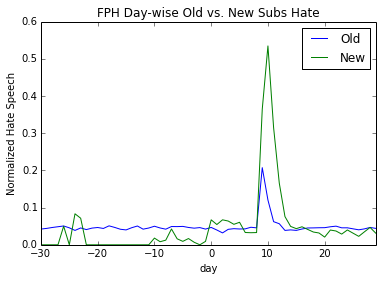

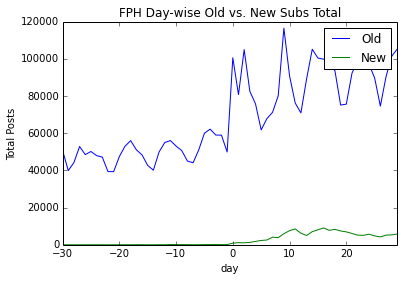

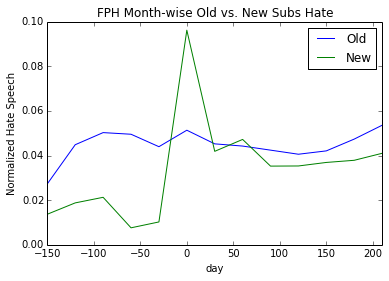

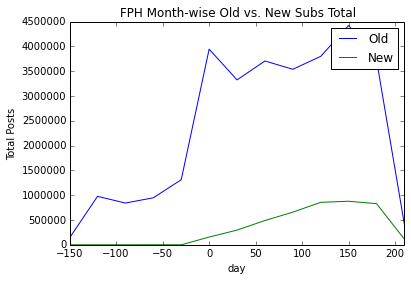

In [8]:
norm_hate_comparison(treatment_subs_sorted_day, treatment_subs_invaded_day, title='FPH Day-wise Old vs. New Subs',label1='Old',label2='New')
total_comparison(treatment_subs_sorted_day, treatment_subs_invaded_day, title='FPH Day-wise Old vs. New Subs',label1='Old',label2='New')
norm_hate_comparison(treatment_subs_sorted_month, treatment_subs_invaded_month, title='FPH Month-wise Old vs. New Subs',label1='Old',label2='New')
total_comparison(treatment_subs_sorted_month, treatment_subs_invaded_month,title='FPH Month-wise Old vs. New Subs',label1='Old',label2='New')

In [9]:
ct_treatment_day_pre = pd.read_csv('reddit_hate/ct/new-treatment-ct-preban-daily-30days.csv')
ct_treatment_day_post = pd.read_csv('reddit_hate/ct/new-treatment-ct-postban-daily-30days.csv')
ct_treatment_month_pre = pd.read_csv('reddit_hate/ct/new-treatment-ct-preban-monthly-2015.csv')
ct_treatment_month_post = pd.read_csv('reddit_hate/ct/new-treatment-ct-postban-monthly-2015.csv')

ct_treatment_day = ct_treatment_day_pre.append(ct_treatment_day_post)
ct_treatment_month = ct_treatment_month_pre.append(ct_treatment_month_post)

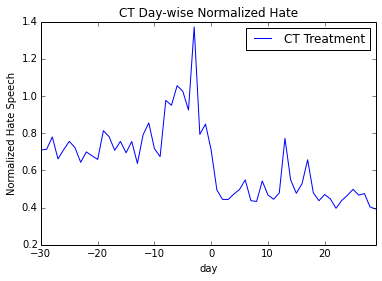

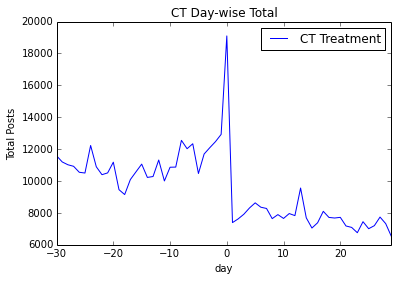

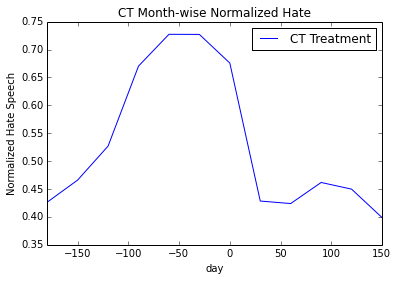

In [10]:
norm_hate_vs_total(ct_treatment_day, title='CT Day-wise',label='CT Treatment')
norm_hate_vs_total(ct_treatment_month, title='CT Month-wise',label='CT Treatment')


In [11]:
# import numpy as np

# df_control_day = df_control_day[df_control_day['total_posts'] != 0]
# df_treatment_day = df_treatment_day[df_treatment_day['total_posts'] != 0]

# # df_control_day['total_posts'] = df_control_day['total_posts'].apply(lambda x: np.log(x))
# # df_treatment_day['total_posts'] = df_treatment_day['total_posts'].apply(lambda x: np.log(x))

# df_control_day = df_control_day.dropna()
# df_treatment_day = df_treatment_day.dropna()

# print df_control_day
# print df_treatment_day

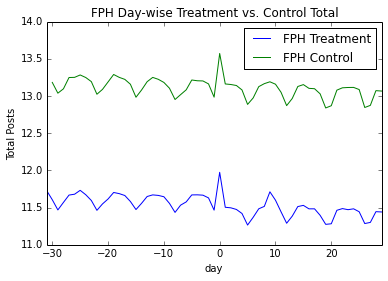

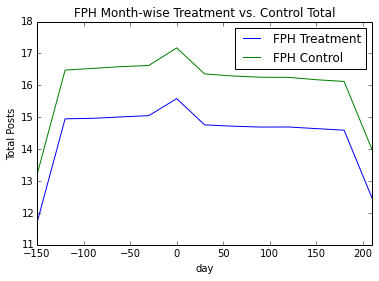

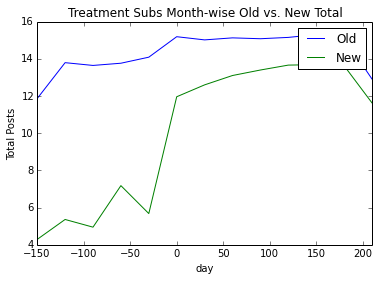

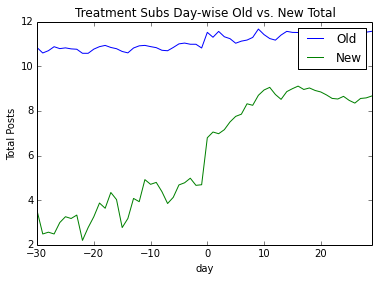

In [12]:
total_comparison_log(df_treatment_day, df_control_day, title='FPH Day-wise Treatment vs. Control',label1='FPH Treatment', label2='FPH Control')
total_comparison_log(df_treatment_month, df_control_month, title='FPH Month-wise Treatment vs. Control',label1='FPH Treatment', label2='FPH Control')
total_comparison_log(treatment_subs_sorted_month, treatment_subs_invaded_month, title='Treatment Subs Month-wise Old vs. New',label1='Old', label2='New')
total_comparison_log(treatment_subs_sorted_day, treatment_subs_invaded_day, title='Treatment Subs Day-wise Old vs. New',label1='Old', label2='New')


In [97]:
groupby_user = df.groupby('user')[['hate_speech', 'total_posts']]

groupby_user_total = groupby_user.sum()['total_posts']
groupby_user_hate = groupby_user.sum()['hate_speech']

num_power_users = 10000

power_users = groupby_user.sum().sort(['hate_speech', 'total_posts'], ascending=False).ix[:num_power_users,:]
# power_users.join(df.set_index('user'))

power_users_info = pd.DataFrame(power_users.index.values, columns=['user']).set_index('user').join(df.set_index('user'))

# groupby_user_hate.plot(y = 'hate_speech')
# plt.ylabel('Hate Speech')
# plt.show()

# groupby_user_total.plot(y = 'total_posts')
# plt.ylabel('Total Posts')
# plt.show()


/Library/Python/2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


       Unnamed: 0  hate_speech  total_posts
day                                        
-16.0  3547599795      18059.0      62618.0
-15.0  3547589797      15079.0      54778.0
-14.0  3547579799      17880.0      60531.0
-13.0  3547569801      19862.0      67890.0
-12.0  3547559803      19901.0      68471.0
-11.0  3547549805      20089.0      68604.0
-10.0  3547539807      19718.0      68568.0
-9.0   3547529809      17622.0      62576.0
-8.0   3547519811      15634.0      54013.0
-7.0   3547509813      22157.0      60263.0
-6.0   3547499815      20866.0      62894.0
-5.0   3547489817      23090.0      69610.0
-4.0   3547479819      24423.0      69616.0
-3.0   3547469821      21847.0      68814.0
-2.0   3547459823      20272.0      66969.0
-1.0   3547449825      15258.0      55369.0
 0.0   5744052021      19220.0      91967.0
 1.0   2196621615      10268.0      57561.0
 2.0   2196631036      10781.0      56923.0
 3.0   2196640457      10210.0      55825.0
 4.0   2196649878       8567.0  

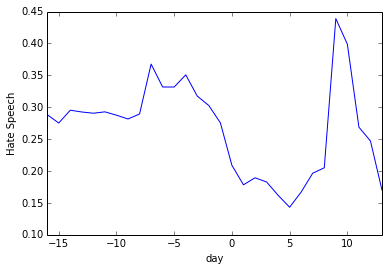

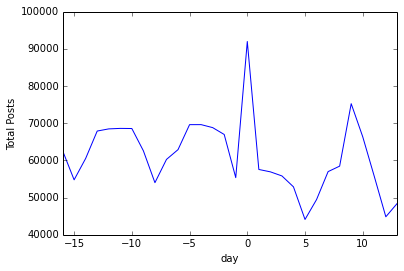

In [98]:
power_users_groupby_day = power_users_info.groupby('day')
power_users_groupby_day[['hate_speech', 'total_posts']]

# print power_users_groupby_day.sum()['hate_speech']

power_users_groupby_day_hate = power_users_groupby_day.sum()['hate_speech'] / power_users_groupby_day.sum()['total_posts']
power_users_groupby_day_total = power_users_groupby_day.sum()['total_posts']

print power_users_groupby_day.sum()

power_users_groupby_day_hate.plot(y = 'hate_speech')
plt.ylabel('Hate Speech')
plt.savefig(str(num_power_users) + '_power_users_hate.jpg')
plt.show()

power_users_groupby_day_total.plot(y = 'total_posts')
plt.ylabel('Total Posts')
plt.savefig(str(num_power_users) + '_power_users_total.jpg')
plt.show()

